## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuno funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







(300, 300)
9.524444444444445 % valori non nulli
True
True
iterazioni stepeest descend:  4000
iterazioni gradiente coniugato:  326
10000.000000000608 è mal condizionata


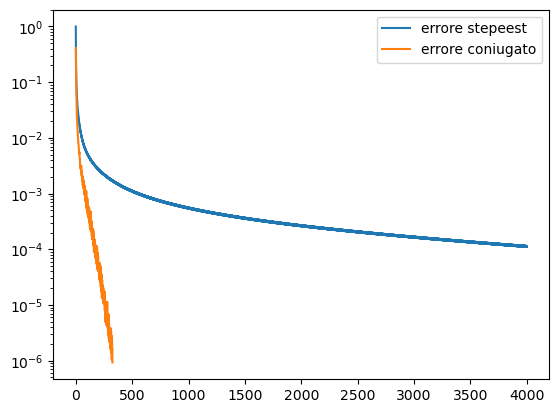

In [40]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

def speepest_desc(A, b, x0, toll ,it_max):
    it = 0
    err_vet = []
    errore = 1000
    
    while it < it_max and errore > toll:
        pk = -A@x0 + b
        rk = -pk.copy()
        ak = (rk.T@rk)/(rk.T@A@rk)
        x1 = x0 + ak*pk
        r1 = rk + ak*A@pk
        
        errore = np.linalg.norm(rk, 2)/np.linalg.norm(b, 2)
        err_vet.append(errore)
        x0 = x1
        it += 1
    
    x = x0
    
    return x, it, err_vet

def grad_coniugato(A, b, x0, toll ,it_max):
    it = 0
    err_vet = []
    errore = 1000
    
    pk = -A@x0 + b
    rk = -pk.copy()
    
    while it < it_max and errore > toll:
        ak = (rk.T@rk)/((A@pk).T@pk)
        x1 = x0 + ak*pk
        r1 = rk + ak*A@pk
        
        errore = np.linalg.norm(r1, 2)/np.linalg.norm(b, 2)
        err_vet.append(errore)
        gamma = (r1.T@r1)/(rk.T@rk)
        p1 = -r1+gamma*pk
        
        rk = r1
        x0 = x1
        pk = p1
        it += 1
    
    x = x0
    
    return x, it, err_vet

dati = loadmat('testI.mat')
A=dati["A"] 
A=A.astype(float)
print(A.shape)
b=dati["b"]
b=b.astype(float)

# primo punto

print(np.count_nonzero(A)/(A.shape[0] * A.shape[1])*100, "% valori non nulli")
# è sparsa

# controllo che sia simmetrica
print(A.all() == A.T.all())

# controllo che sia definita positiva
auto_val = np.linalg.eigvals(A)
print(auto_val.all() > 0)

# sono applicabili perchè ci sono tutte le condizioni per poter usare quei metodi
# Sia A ∈ a R^(n*n) , matrice simmetrica e definita positiva, 𝑏,𝑥∈𝑅𝑛, allora la soluzione del sistema lineare
# Ax = b (1)
# coincide con il punto di minimo della seguente funzione quadratica
# 𝐹(𝑥)=1/2*<𝐴𝑥,𝑥>−<𝑏,𝑥>
# SI TROVA NEL PDF METODI DI DISCESA DI STEPEEST DESCEND PRIMO TEOREMA

# secondo punto

toll=1e-6
maxit=4000
x0 = np.zeros_like(b)
x, it, err_vet = speepest_desc(A, b, x0, toll ,maxit)
print("iterazioni stepeest descend: ", it)
xC, itC, err_vetC = grad_coniugato(A, b, x0, toll ,maxit)
print("iterazioni gradiente coniugato: ", itC)

plt.semilogy(np.arange(it), err_vet, np.arange(itC), err_vetC)
plt.legend(['errore stepeest', 'errore coniugato'])


In [43]:
# terzo punto

print(np.linalg.cond(A), "è mal condizionata")
e0s = err_vet[0]
vel_conv = ((np.linalg.cond(A)-1)/(np.linalg.cond(A)+1))*e0s
print(vel_conv) # RICORDA: più ci si avvicina ad 1 più è lenta la velocità di convergenza alla soluzione del problema
# ciò è determinato dal condizionamnento della matrice data di partenza
e0C = err_vetC[0]
vel_conv_coniug = ((np.sqrt(np.linalg.cond(A))-1)/(np.sqrt(np.linalg.cond(A))+1))*e0C
print(vel_conv_coniug)

10000.000000000608 è mal condizionata
0.9998000199980002
0.402688435735559


In [49]:
# quarto punto

A1=A+np.eye(A.shape[0])*0.05
b1=np.sum(A1, axis=1).reshape(A1.shape[0],1)
x0=np.zeros_like(b1)

x, it, err_vet = speepest_desc(A1, b1, x0, toll ,maxit)
print("iterazioni stepeest descend: ", it)
xC, itC, err_vetC = grad_coniugato(A1, b1, x0, toll ,maxit)
print("iterazioni gradiente coniugato: ", itC)

e0s = err_vet[0]
vel_conv = ((np.linalg.cond(A1)-1)/(np.linalg.cond(A1)+1))*e0s
print(vel_conv)
e0C = err_vetC[0]
vel_conv_coniug = ((np.sqrt(np.linalg.cond(A1))-1)/(np.sqrt(np.linalg.cond(A1))+1))*e0C
print(vel_conv_coniug)

iterazioni stepeest descend:  128
iterazioni gradiente coniugato:  30
0.9089173711480775
0.2953863285466474


## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [62]:
import SolveTriangular
import numpy as np
from scipy.linalg import cholesky

x =np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y =np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] )

punti = np.linspace(1,3,200)

# Per capire perchè viene usato vander vai nel Pdf sui sistemi sovradeterminati PAG.13
m=x.shape[0]
n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A=np.vander(x,increasing=True)[:,:n1]
print(np.linalg.cond(A)) # è ben condizionata
print(np.linalg.matrix_rank(A)) # ha rango massimo

# perciò si usa l'algoritmo delle eq.normali

def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G= A.T@A
    f= A.T@b
    
    # uso Cholesky per la teoria (a caso)
    L= cholesky(G, lower=True)
    U=L.T
    z, flag=SolveTriangular.Lsolve(L,f)
    x, flag=SolveTriangular.Usolve(U,z)
    
    return x

coeff = eqnorm(A,y)
# polyval prende i coefficienti del polinomio e li calcola per i valori passanti nel secondo argomento
val_punti1 = np.polyval(np.flip(coeff), punti)

8.419376035116738
2


- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [58]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
        xzeri=xnodi[1:n]
    else:
        xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    # cosi ti ritorna il polimonio
    
    return p

def InterpL(x, y, xx):
    """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
    """
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p, xx)
    
    return L@y

val_iterpol1 = InterpL(x,y,punti)

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

In [63]:
yi = [ 2*x[i]+1 for i in range(0,11) ]
print(yi)


coeff = eqnorm(A,yi)
# polyval prende i coefficienti del polinomio e li calcola per i valori passanti nel secondo argomento
# valori presi da polinomio di approssimazione
val_punti2 = np.polyval(np.flip(coeff), punti)
val_iterpol2 = InterpL(x,yi,punti)

[3.0, 3.4, 3.8, 4.2, 4.6, 5.0, 5.4, 5.8, 6.2, 6.6, 7.0]


- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti$(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

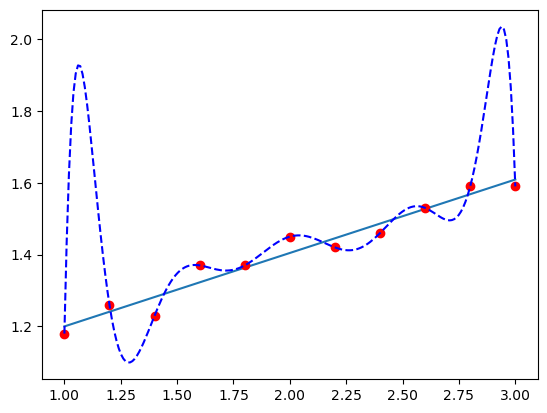

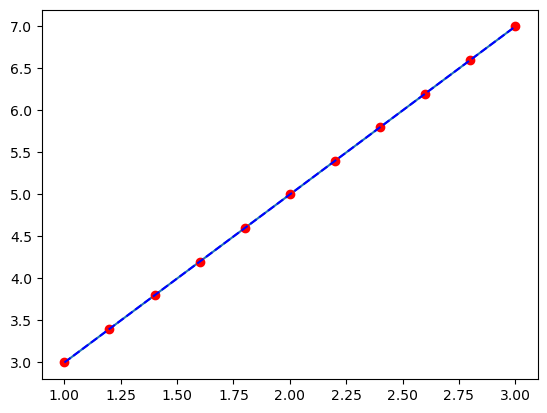

In [64]:
import matplotlib.pyplot as plt

# grafico fatto con il polinomio di approssimazione 
plt.plot(punti,val_punti1)
plt.plot(x,y,'ro',punti,val_iterpol1,'b--')
plt.show()

# grafico fatto con il polinomio di approssimazione 
plt.plot(punti,val_punti2)
plt.plot(x,yi,'ro',punti,val_iterpol2,'b--')
plt.show()



- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

In [66]:
cond = lambda n: 2**(n+1) / n*np.log(n)
print(f'Condizionamento del problema n → {len(x)}; LEB → {cond(len(x))}')

print("\nL'interpolazione con nodi equispaziati fornisce fitte oscillazioni agli estremi dell'intervallo\n" \
      + "dovute all'irregolarita della funzione (primo caso). Dall'indice di condizionamento possiamo \nnotare che "\
      + "risulta abbastanza elevato e dunque l'amplificazione degli errori è maggiore")

Condizionamento del problema n → 11; LEB → 892.8890033983752

L'interpolazione con nodi equispaziati fornisce fitte oscillazioni agli estremi dell'intervallo
dovute all'irregolarita della funzione (primo caso). Dall'indice di condizionamento possiamo 
notare che risulta abbastanza elevato e dunque l'amplificazione degli errori è maggiore


                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
